In [4]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv("/kaggle/input/ecommerce-behavior-data-from-multi-category-store/2019-Nov.csv")

# Display the first few rows and basic information about the dataset
print(data.head())
print(data.info())

# Summary statistics
print(data.describe())

                event_time event_type  product_id          category_id  \
0  2019-11-01 00:00:00 UTC       view     1003461  2053013555631882655   
1  2019-11-01 00:00:00 UTC       view     5000088  2053013566100866035   
2  2019-11-01 00:00:01 UTC       view    17302664  2053013553853497655   
3  2019-11-01 00:00:01 UTC       view     3601530  2053013563810775923   
4  2019-11-01 00:00:01 UTC       view     1004775  2053013555631882655   

               category_code   brand   price    user_id  \
0     electronics.smartphone  xiaomi  489.07  520088904   
1  appliances.sewing_machine  janome  293.65  530496790   
2                        NaN   creed   28.31  561587266   
3  appliances.kitchen.washer      lg  712.87  518085591   
4     electronics.smartphone  xiaomi  183.27  558856683   

                           user_session  
0  4d3b30da-a5e4-49df-b1a8-ba5943f1dd33  
1  8e5f4f83-366c-4f70-860e-ca7417414283  
2  755422e7-9040-477b-9bd2-6a6e8fd97387  
3  3bfb58cd-7892-48cc-8020-2f17e

In [5]:
print(data.isnull().sum())
data.dropna(inplace=True)
print(data.head())

event_time              0
event_type              0
product_id              0
category_id             0
category_code    21898171
brand             9224078
price                   0
user_id                 0
user_session           10
dtype: int64
                event_time event_type  product_id          category_id  \
0  2019-11-01 00:00:00 UTC       view     1003461  2053013555631882655   
1  2019-11-01 00:00:00 UTC       view     5000088  2053013566100866035   
3  2019-11-01 00:00:01 UTC       view     3601530  2053013563810775923   
4  2019-11-01 00:00:01 UTC       view     1004775  2053013555631882655   
5  2019-11-01 00:00:01 UTC       view     1306894  2053013558920217191   

               category_code   brand   price    user_id  \
0     electronics.smartphone  xiaomi  489.07  520088904   
1  appliances.sewing_machine  janome  293.65  530496790   
3  appliances.kitchen.washer      lg  712.87  518085591   
4     electronics.smartphone  xiaomi  183.27  558856683   
5         com

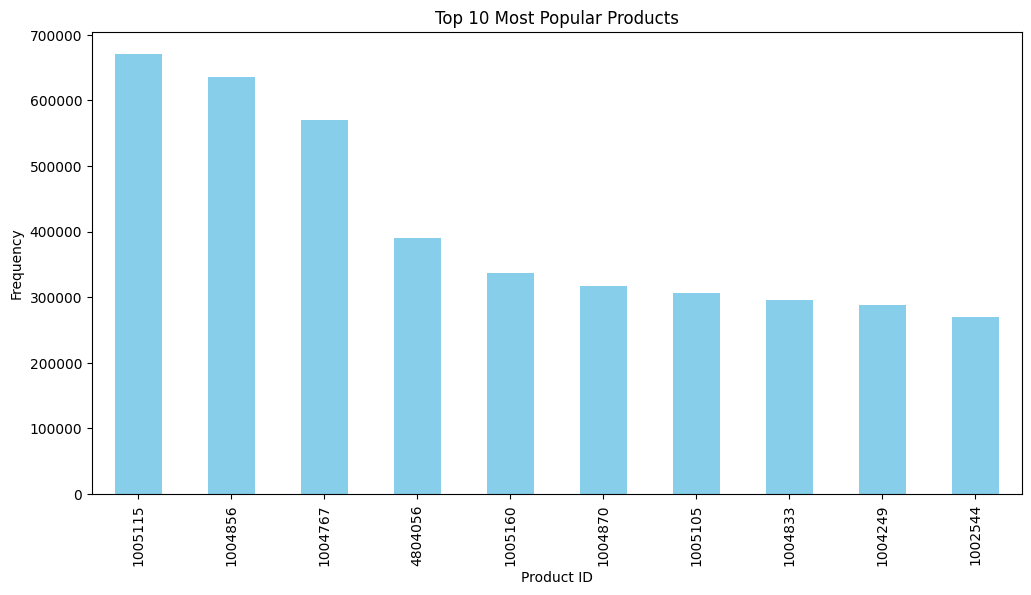

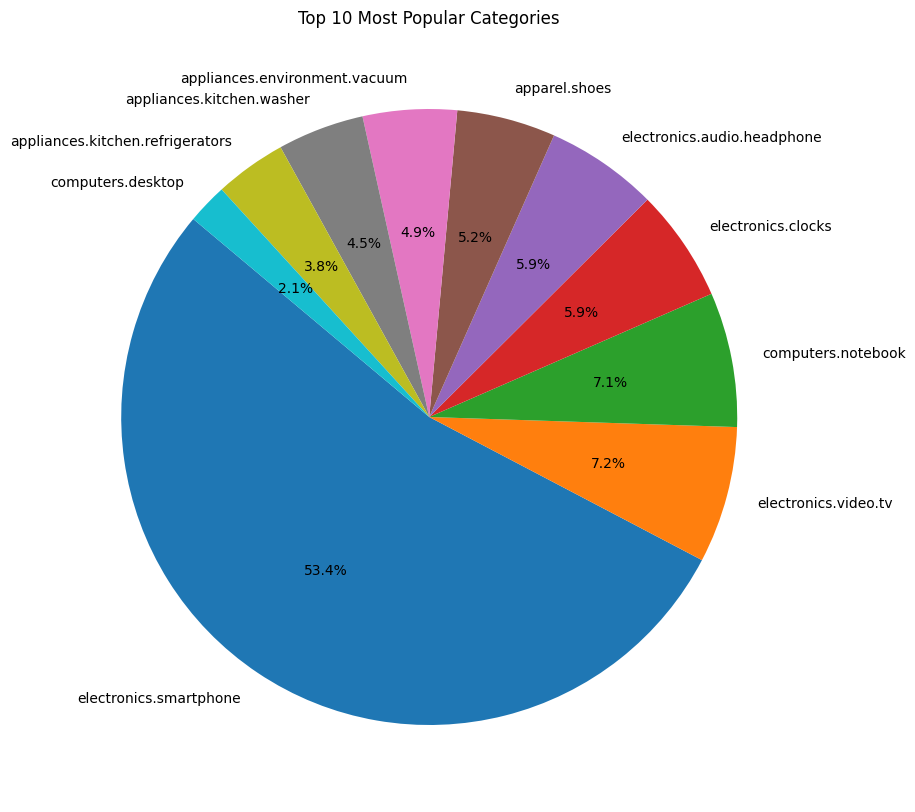

In [7]:
popular_products = data['product_id'].value_counts().head(10)
plt.figure(figsize=(12,6))
popular_products.plot(kind='bar', color='skyblue')
plt.xlabel('Product ID')
plt.ylabel('Frequency')
plt.title('Top 10 Most Popular Products')
plt.show()
popular_categories = data['category_code'].value_counts().head(10)
plt.figure(figsize=(10,10))
plt.pie(popular_categories, labels=popular_categories.index, autopct='%1.1f%%', startangle=140)
plt.title('Top 10 Most Popular Categories')
plt.show()


In [8]:
import plotly.graph_objects as go
fig = go.Figure(go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=["Product A", "Product B", "Product C", "Product D"],
    ),
    link=dict(
        source=[0, 1, 2, 0, 3],  # indices correspond to labels
        target=[2, 3, 3, 1, 2],
        value=[8, 4, 2, 8, 2],
    )
))

fig.update_layout(title_text="User Click Patterns - Sankey Diagram", font_size=10)
fig.show()
